# Implémentation avec `class`e!

Nous allons définir nos propres `Cellule`s et nous appuyer sur elles pour définir des `Liste`s chaînées simples.

**CONSIGNE**: On donne à chaque fois un début d'implémentation avec des parties manquantes marquées par `___` et qu'il faut compléter de façon à passer les assertions qui suivent immédiatement.

## Classe `Cellule`

Une `Cellule` comporte deux **attributs**:
- `valeur`: qui pointe vers la donnée transportée par la cellule,
- `_suivante`: qui pointe (ou fait référence à) la cellule suivante - non pas à sa valeur - s'il y en a une.

<center>
    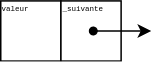
</center>

In [ ]:
class Cellule:
    """Fondation du type ListeSimple"""
    def __init__(self, valeur, suivante=None):
        self.valeur = valeur
        # éviter de jouer avec ce pointeur en écriture
        # convention «underscore»: _attrib
        self._suivante = suivante

    # Pour donner accès en lecture à l'attribut _suivante
    # Si c est une Cellule, «cell = c.suivante» est licite
    # mais pas «c.suivante = valeur»
    @property # on appelle cela un décorateur.
    def suivante(self):
        return self._suivante

**IMPORTANT**: Afin de pouvoir définir la classe dans des cellules successives du notebook (petit à petit), nous définirons une méthode par cellule du notebook en utilisant la syntaxe:

```python
def fn(self,...):
    ...

# fn est «accroché» à la classe «Classe» et deviens une méthode de cette classe
Classe.fn = fn 
# on supprime le nom «décroché» fn de l'espace de nommage courant
del fn
```

Il s'agit juste d'une *astuce technique*: ordinairement, les méthodes sont définies dans le corps de la construction `class`.

### `__str__`

On souhaite pouvoir afficher la valeur d'une cellule ainsi que celles qui la suivent s'il y en a.

In [ ]:
# À COMPLETER
# fn spéciale: renvoie une chaîne de caractère pour utilisation avec print
def __str__(self):
    # cas de base:
    # la cellule n'a pas de suivante
    if self.___ is None:
        return f"{self.___}"
    
    # Appel récursif
    return f"{self.valeur} → {___}"
        

Cellule.__str__ = __str__
del __str__

In [ ]:
c0, c1, c3 = Cellule("zéro"), Cellule("un"), Cellule("trois")
c2 = Cellule("deux", c3)
c0._suivante = c1; c1._suivante = c2

assert str(c0) == "zéro → un → deux → trois"
assert str(c3.suivante) == "None"

**solution**

In [ ]:
# fn spéciale: renvoie une chaîne de caractère pour utilisation avec print
def __str__(self):
    # cas de base:
    # la cellule n'a pas de suivante
    if self._suivante is None:
        return f"{self.valeur}"
    
    # Appel récursif
    return f"{self.valeur} → {self._suivante}"
        

Cellule.__str__ = __str__
del __str__

### Digression: Gestion automatique de la mémoire

Lorsqu'un objet n'est plus accessible car aucun nom n'y fait plus référence, Python libère *automatiquement* l'espace mémoire occupé par l'objet.

Juste avant de libérer (pour réutilisation) l'espace mémoire d'un objet, Python appelle sa méthode `__del__` si elle existe.

In [ ]:
# Pour voir le fonctionnement du «ramasse miette» (garbage collector)
def __del__(self):
    print(f"libération de la mémoire occupée par la cellule contenant la valeur: {self.valeur}")

Cellule.__del__ = __del__
del __del__

In [ ]:
# n'exécuter qu'une fois
test = Cellule("coeur", Cellule("carreau", Cellule("pique", Cellule("trèfle"))))
lien = test._suivante._suivante

In [ ]:
# exécuter plusieur fois et observez attentivement l'affichage
test = test._suivante

À chaque exécution, `test` pointe vers la cellule qui suit la cellule de tête courante! La cellule de tête n'est plus accessible (sauf s'il s'agit de celle pointée par `lien`).

Observer que "coeur" et "carreau" sont supprimés mais ni "pique", ni "trèfle"; pour "trèfle" cela peut étonner... voyez-vous l'explication?

Supprimons cette méthode pour éviter d'avoir des messages à chaque fois qu'une cellule est détruite:

In [ ]:
del test; del lien
del Cellule.__del__

### Récapitulatif pour la classe `Cellule`

In [ ]:
class Cellule:
    """Fondation du type ListeSimple"""
    def __init__(self, valeur, suivante=None):
        self.valeur = valeur
        self._suivante = suivante  # éviter de jouer avec ce pointeur...

    @property
    def suivante(self):
        return self._suivante

    def __str__(self):
        if self._suivante is None:
            return f"{self.valeur}"
        return f"{self.valeur} → {self._suivante}"

Vérifions que vous comprenez bien le fonctionnement de cette classe:

In [ ]:
liste = Cellule("tête",Cellule("queue"))
print(liste)
print(f"type: {type(liste)}")

Ajouter une cellule comportant la donnée `"corps"` en milieu de chaîne.

In [ ]:
# à toi de jouer

In [ ]:
assert str(liste) == "tête → corps → queue"

**solution**

In [ ]:
corps = Cellule("corps")
corps._suivante = liste._suivante
liste._suivante = corps
print(liste)

À partir de là, il serait simple de réimplémenter les fonctions `liste_chaine_simple`, `ajouter`, ...

Mais au lieu de le faire de «l'extérieur» nous allons mettre une coquille `Liste` pour **encapsuler** nos cellules.

## Classe `Liste`

### Interface minimale

Voici une **interface** pour `Liste`:
- **attributs** privés: `_tete: Cellule`, `_queue: Cellule` et `_taille: int`. Les deux premiers sont accessibles via `tete` et `queue` depuis le code «client» (cf. le décorateur `@property`).
- **méthodes**:
    - `inserer_apres(valeur[, cellule])`: Insère valeur juste après cellule. Si cellule n'est pas précisée, l'insertion se fait en tête.
    - `supprimer_apres([cellule]) -> <valeur>`: Supprime et renvoie la valeur située dans la cellule qui suit celle fournie.
        Si aucune cellule n'est précisée, supprimer la cellule de tête.
    - *spéciales*: `__len__` pour le nombre de ses éléments et `__str__` pour sa représentation en chaîne.

*Note*: Dans cette façon de préciser l'interface, les `[`, `]` indique un (ou des) paramètre(s) optionnel(s) et `->` indique une valeur de retour;  `: <type>` est utilisé optionnellement pour précisé le type de la valeur qu'il précède.

```python
class Liste:
    """Une liste chaînée simple - utilise Cellule"""
    def __init__(self):
        """Crée une liste chaînée vide"""
        # trois attributs privés: __tete, __queue et __taille
        pass
    @property
    def tete(self):
        return self.__tete
    @property
    def queue(self):
        return self.__queue
    def inserer_apres(self, valeur, cellule=None):
        """
        Insère valeur juste après cellule. 
        Si cellule n'est pas précisée, l'insertion se fait en tête.
        """
        pass
    def supprimer_apres(self, cellule=None):
        """
        Supprime et renvoie la valeur située dans la cellule qui suit celle fournie.
        Si aucune cellule n'est précisée, supprimer la cellule de tête.
        """
        pass
    ## MÉTHODES SPÉCIALES
    def __len__(self):
        pass 
    def __str__(self):
        pass
```

*Note*: Les `@property` transforme les méthodes qu'elles précèdent en «propriété». Cela permet à l'utilisateur de la classe d'accéder aux attributs privés `_tete` et `_queue` en lecture seule. Si `l` est une instance de `Liste`, l'utilisateur peut utiliser les écritures `l.tete` ou `l.queue` - sans parenthèses - pour accéder à la première et à la dernière cellule de la liste.

Les *méthodes spéciales* permettrons respectivement à l'utilisateur de:
- `__len__`: consulter la taille de la liste avec `len(liste)`,
- `__str__`: obtenir une description de la liste sous la forme d'une chaîne de caractères avec `str(liste)`.

Enfin, les **méthodes d'insertion et de suppression** à une position arbitraire de la liste possède le suffixe «apres» du fait de la **nature unidirectionnelle** des listes chaînées simples. Nous en reparlerons bientôt.

### Exemples de «code client»

L'**implémentation** de `Liste` est cachée dans la cellule qui suit. Notre objectif pour l'instant est seulement de voir comment ces listes s'*utilisent*.

**EXÉCUTER LÀ SANS L'OUVRIR!**

In [ ]:
class Cellule:
    """Fondation du type ListeSimple"""
    def __init__(self, valeur, suivante=None):
        self.valeur = valeur
        self._suivante = suivante  # éviter de jouer avec ce pointeur...

    @property
    def suivante(self):
        return self._suivante

    def __str__(self):
        if self._suivante is None:
            return f"{self.valeur}"
        return f"{self.valeur} → {self._suivante}"

class Liste:
    """Une liste chaînée simple - utilise Cellule"""
    def __init__(self):
        """Crée une liste chaînée vide"""
        self._tete = None
        self._queue = None
        self._taille = 0

    @property
    def tete(self):
        return self._tete

    @property
    def queue(self):
        return self._queue
    
    def __len__(self):
        return self._taille

    def __str__(self):
        if self._tete is None:
            return "None"
        else:
            return str(self._tete)

    def inserer_apres(self, valeur, cellule=None):
        """
        Insère valeur juste après cellule. Si cellule n'est pas précisée, l'insertion se fait en tête.
        """
        self._taille += 1
        cell = Cellule(valeur)

        # insertion en tête
        if cellule is None:
            cell._suivante = self._tete
            self._tete = cell
            # si la cellule est seule, elle est aussi la queue!
            if self._tete._suivante is None:
                self._queue = cell
            return

        # insertion queue
        if cellule._suivante is None:
            cellule._suivante = cell
            self._queue = cell
            return

        # insertion ailleurs
        cell._suivante = cellule._suivante
        cellule._suivante = cell

    def supprimer_apres(self, cellule=None):
        """
        Supprime et renvoie la valeur située dans la cellule qui suit celle fournie. Si aucune cellule n'est
        précisée, supprimer la cellule de tête.
        """
        # la liste est vide ou cellule n'a pas de suivante
        if self._tete is None or (cellule is not None and cellule._suivante is None):
            raise IndexError("Liste vide!")

        self._taille -= 1
        # supprimer en tête
        if cellule is None:
            v = self.tete.valeur
            if self._tete._suivante is None:
                self._queue = None
            self._tete = self.tete._suivante
            return v

        # ailleurs
        v = cellule._suivante.valeur
        # mais peut-être la queue
        if cellule._suivante is self._queue:
            self._queue = cellule
        cellule._suivante = cellule._suivante._suivante
        # penser à renvoyer la valeur effectivement supprimée
        return v



Puis «jouer» avec les extraits de code qui suivent:

In [ ]:
liste = Liste() # __init__
for v in "Python", "est", "incroyable", "!":
    liste.inserer_apres(v)
print(liste) # __str__

In [ ]:
type(liste) # nous avons défini notre propre type!

In [ ]:
len(liste) # __len__

In [ ]:
liste.inserer_apres("Impressionant", liste.queue)
print(liste)

In [ ]:
liste.inserer_apres("Non?")
print(liste)

In [ ]:
valeur = liste.supprimer_apres()
print(f"valeur: {valeur}")
print(f"liste: {liste}")

## Implémentation «pas à pas» de `Liste`

Assurez-vous que la classe `Cellule` a été exécutée avant de poursuivre. On donne ce point de départ:

In [ ]:
class Liste:
    """Une liste chaînée simple - utilise Cellule"""
    def __init__(self): # déclarer et initialiser les attributs ici
        """Crée une liste chaînée vide """
        self._tete = None  # pointe vers la cellule de tête
        self._queue = None # même chose pour la queue
        self._taille = 0   # nb de cellules
    
    @property
    def tete(self):
        return self._tete

    @property
    def queue(self):
        return self._queue
    
    def __len__(self):
        return self._taille
    
    def __str__(self):
        return str(self._tete) # voir la classe Cellule
    

Testons le brièvement:

In [ ]:
liste = Liste()
assert len(liste) == 0
assert liste.tete == liste.queue and liste.tete == None
assert str(liste) == "None"

### `inserer_apres`

Il y a plusieurs cas à considérer:

1. **cas générique**: la cellule précisée en deuxième argument n'est pas la cellule en queue.

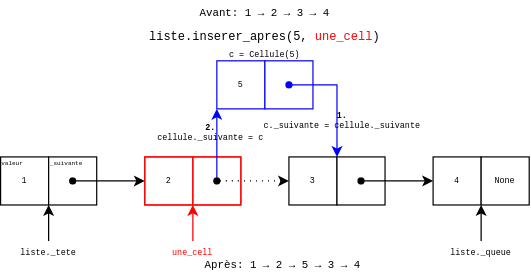

2. **cas particuliers**:
    1. la cellule précisée en deuxième argument est celle de queue.

    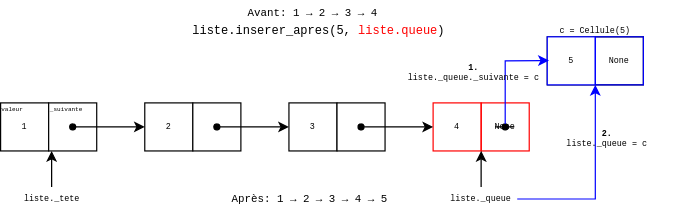
    
    2. aucune cellule n'est précisée, l'insertion a lieu en tête (la liste est supposée non vide)
    
    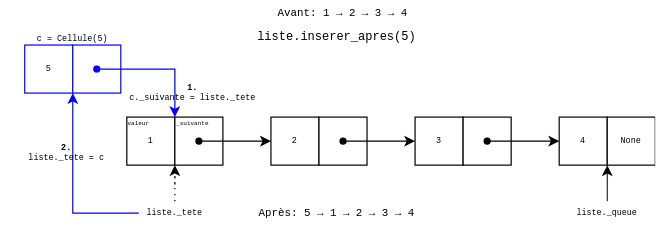
    
    3. insertion dans une liste vide (sous cas du cas précédent):
    
    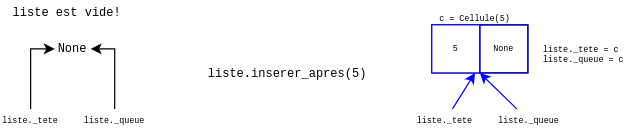

Après avoir étudié soigneusement les figures précédentes, compléter (en prenant garde que ce qui est appelé `liste` dans les figures est ici `self`):

In [ ]:
# À COMPLETER
def inserer_apres(self, valeur, cellule=None):
    """
    Insère valeur juste après cellule. Si cellule n'est pas précisée, l'insertion se fait en tête.
    """
    self._taille ___
    cell = Cellule(valeur)

    # insertion en tête
    if cellule is __:
        cell._suivante = ___
        ___ = cell
        # si la liste était vide cette cellule est aussi la queue!
        if ___:
            ___
        return

    # insertion en queue
    if ___:
        ___
        ___
        return

    # insertion ailleurs
    ___
    ___

# Accrochage ...
Liste.inserer_apres = inserer_apres
del inserer_apres

Vérifier que votre implémentation passe les tests:

In [ ]:
liste = Liste()
for i in range(3):
    liste.inserer_apres(i)
assert str(liste) == "2 → 1 → 0"
for i in range(3):
    liste.inserer_apres(i, liste.queue)
assert str(liste) == "2 → 1 → 0 → 0 → 1 → 2"
liste.inserer_apres(3, liste.tete)
assert str(liste) == "2 → 3 → 1 → 0 → 0 → 1 → 2"

**solution**

In [ ]:
def inserer_apres(self, valeur, cellule=None):
    """
    Insère valeur juste après cellule. Si cellule n'est pas précisée, l'insertion se fait en tête.
    """
    self._taille += 1
    cell = Cellule(valeur)

    # insertion en tête
    if cellule is None:
        cell._suivante = self._tete
        self._tete = cell
        # si la cellule est seule, elle est aussi la queue!
        if self._tete._suivante is None:
            self._queue = cell
        return

    # insertion queue
    if cellule._suivante is None:
        cellule._suivante = cell
        self._queue = cell
        return

    # insertion ailleurs
    cell._suivante = cellule._suivante
    cellule._suivante = cell

# Accrochage ...
Liste.inserer_apres = inserer_apres
del inserer_apres

### `supprimer_apres`

Tout d'abord, la suppression n'est **pas toujours possible**: si la liste est vide ou si la cellule précisée n'a pas de suivante. Dans ce cas, on choisit de lever une erreur de type `IndexError`.

Ensuite, lorsque la suppression est possible, ne pas oublier de récupérer et renvoyer la valeur de la cellule qu'on va supprimer. Il y a plusieurs cas de figure aussi:

1. **cas générique**: la liste contient plus d'une cellule et la cellule précisée a une suivante qui n'est pas la queue.

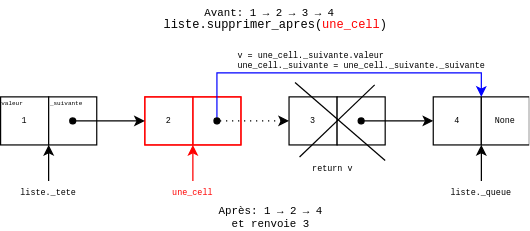

2. **Cas particuliers**:
    1. la suivante de la cellule précisée est la queue,
    
    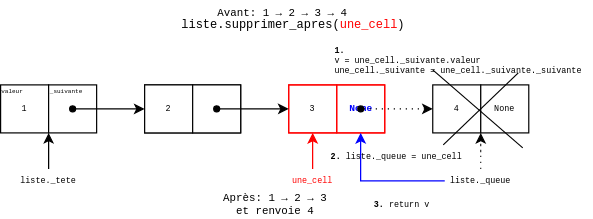
    
    2. aucune cellule n'est précisée: on supprime la tête,
    
    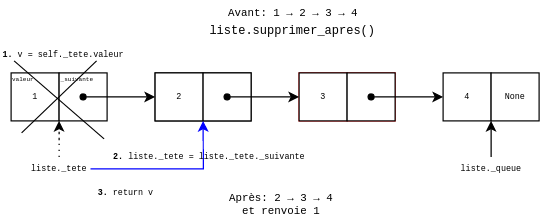
    
    3. on supprime la dernière cellule de la liste (sous cas du précédent).
    
    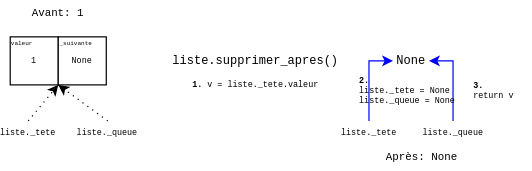

Après avoir étudié soigneusement les figures précédentes, compléter:

In [ ]:
# À COMPLÉTER
def supprimer_apres(self, cellule=None):
    """
    Supprime et renvoie la valeur située dans la cellule qui suit celle fournie. Si aucune cellule n'est
    précisée, supprimer la cellule de tête.
    """
    # la liste est vide ou cellule n'a pas de suivante
    if ___ or (___ and ___):
        raise IndexError("Liste vide ou aucune cellule après celle fournie.")
    
    self._taille ___
    # supprimer en tête
    if ___:
        v = self.tete.___
        # si la liste n'a qu'une cellule
        if ___:
            ___
        self._tete = ___
        return v

    # ailleurs
    v = ___
    # mais peut-être en queue
    if ___:
        ___
    cellule.___ = cellule.____
    
    # penser à renvoyer la valeur effectivement supprimée
    return v

Liste.supprimer_apres = supprimer_apres
del supprimer_apres

Vérifier que votre implémentation passe les tests:

In [ ]:
liste = Liste()
for i in range(4):
    liste.inserer_apres(i)
v = liste.supprimer_apres()
assert v == 3 and str(liste) == "2 → 1 → 0"
v = liste.supprimer_apres(liste.tete)
assert v == 1 and str(liste) == "2 → 0"
v = liste.supprimer_apres(liste.tete)
assert liste.queue.valeur == 2 and liste.tete == liste.queue and str(liste) == "2"
try:
    liste.supprimer_apres(liste.queue)
except IndexError:
    pass
except Exception:
    raise AssertionError("devrait produire une erreur de type IndexError: suppression après queue!")
liste.supprimer_apres()
assert liste.tete == liste.queue and liste.tete == None
try:
    liste.supprimer_apres()
except IndexError:
    pass
except Exception:
    raise AssertionError("devrait produire une erreur de type IndexError: la liste est vide!")

**solution**

In [ ]:
def supprimer_apres(self, cellule=None):
    """
    Supprime et renvoie la valeur située dans la cellule qui suit celle fournie. Si aucune cellule n'est
    précisée, supprimer la cellule de tête.
    """
    # la liste est vide ou cellule n'a pas de suivante
    if self._tete is None or (cellule is not None and cellule._suivante is None):
        raise IndexError("Liste vide!")
    
    self._taille -= 1
    # supprimer en tête
    if cellule is None:
        v = self.tete.valeur
        if self._tete._suivante is None:
            self._queue = None
        self._tete = self.tete._suivante
        return v

    # ailleurs
    v = cellule._suivante.valeur
    # mais peut-être la queue
    if cellule._suivante is self._queue:
        self._queue = cellule
    cellule._suivante = cellule._suivante._suivante
    # penser à renvoyer la valeur effectivement supprimée
    return v

Liste.supprimer_apres = supprimer_apres
del supprimer_apres

## Exercices

Bien sûr, on peut «augmenter» notre interface en ajoutant des méthodes à la classe («spéciales ou non).

### 1 - Insertion/suppression

On souhaite fournir à l'utilisateur des méthodes simples à utiliser `inserer_[tete|queue]` et `supprimer_tete`.

Implémenter ces méthodes en exploitant l'interface existante:

In [ ]:
def inserer_tete(self, valeur):
    pass

def inserer_queue(self, valeur):
    pass

def supprimer_tete(self):
    pass

Liste.inserer_tete = inserer_tete
Liste.inserer_queue = inserer_queue
Liste.supprimer_tete = supprimer_tete
del inserer_tete; del inserer_queue; del supprimer_tete

Tester!

In [ ]:
liste = Liste()
liste.inserer_queue("un");liste.inserer_queue("deux");liste.inserer_tete("trois")
acc = []
for i in range(2):
    acc.append(liste.supprimer_tete())
assert acc == ["trois", "un"] and str(liste) == "deux"

**solution**

In [ ]:
def inserer_tete(self, valeur):
    self.inserer_apres(valeur)

def inserer_queue(self, valeur):
    self.inserer_apres(valeur, self._queue)

def supprimer_tete(self):
    return self.supprimer_apres()

Liste.inserer_tete = inserer_tete
Liste.inserer_queue = inserer_queue
Liste.supprimer_tete = supprimer_tete
del inserer_tete; del inserer_queue; del supprimer_tete

Toutes les méthodes implémentées jusqu'ici sont $O(1)$ (le temps ne dépend pas du nombre d'éléments dans la liste).

Pourquoi ne peut-on pas fournir une méthode rapide - en $O(1)$ - `supprimer_queue`?

**solution**

On ne peut le faire «rapidement» car il faudrait pouvoir «remonter» de la cellule de queue à celle qui précède pour mettre à jour l'attribut `_queue`. Malheureusement les pointeurs de cellules ne vont que dans un sens (de la tête vers la queue).

On peut tout de même implémenter cette méthode mais sa complexité sera $O(n)$ où $n$ est le nombre d'élément de la liste.

### 2 - `copier()`

On souhaite pouvoir renvoyer une copie de notre liste de façon à disposer de deux listes indépendantes.

**Remarque**: On ne poussera pas le vice jusqu'à faire une copie d'une valeur qui pourrait elle-même être une liste; on parle alors de copie superficielle (voir en fin de section si ce n'est pas clair).

In [ ]:
# À COMPLÉTER
def copier(self):
    """Renvoie une copie «superficielle» de la liste courante"""
    ret = Liste()
    courant = ___
    while courant is not ___:
        ___
        ___
    return ___

# Accrochage ...
Liste.copier = copier
del copier

In [ ]:
liste = Liste(); liste.inserer_queue(1);liste.inserer_queue(2);liste.inserer_queue(3)
copie = liste.copier()
liste.supprimer_tete()
copie.inserer_tete(0)

assert str(liste) == "2 → 3" and str(copie) == "0 → 1 → 2 → 3"

**solution**

In [ ]:
def copier(self):
    """Renvoie une copie «superficielle» de la liste courante"""
    ret = Liste()
    courant = self._tete
    while courant is not None:
        ret.inserer_queue(courant.valeur)
        courant = courant._suivante
    return ret

Liste.copier = copier
del copier

Si vous ne comprenez toujours pas le terme «superficiel» pour copie, tester et réfléchir:

In [ ]:
liste = Liste()
liste.inserer_queue("tete"); liste.inserer_queue(Liste())
copie = liste.copier()
# accès à la sous-liste interne
sous_liste = copie.queue.valeur
sous_liste.inserer_tete("queue")
# cela impacte-t-il liste?
print(f"liste: {liste}, copie: {copie}")

### 3 - Rendre la liste «indexable»

Lorsqu'on écrit `var[i]` python le traduit (en interne) en `var.__getitem__(i)`. 

Ainsi, si l'objet référence par `var` dispose de cette méthode, il devient indexable.

In [ ]:
# À COMPLÉTER
def __getitem__(self, i):
    # On lève une erreur si i n'est pas dans [0,...,len(self) - 1]
    if ___:
        raise IndexError("Index hors des bornes")
    
    # Efficacité: cas particulier de la dernière valeur
    ___
    
    # Autrement, on parcourt la liste
    j = 0
    courante = ___
    while ___ < ___:
        ___
        ___
    return ___

# Accrochage ...
Liste.__getitem__ = __getitem__
del __getitem__

In [ ]:
liste = Liste()
for i in reversed(range(1, 6)):
    liste.inserer_tete(i)
assert liste[0] == 1 and liste[4] == 5 and liste[2] == 3
try:
    liste[15]
    print("il y a un problème!")
except: pass
try:
    liste[-1]
    print("il y en a un autre!")
except: pass

**solution**

In [ ]:
# «truc[i]» est traduit en «truc.__getitem__(i)»
def __getitem__(self, i):
    # On lève une erreur si i n'est pas dans [0,...,len(self) - 1]
    if i < 0 or i >= self._taille:
        raise IndexError("Index hors des bornes")
    
    # Efficacité: cas particulier de la dernière valeur
    if i == self._taille - 1:
        return self._queue.valeur
    # Autrement, on parcourt la liste
    j = 0
    courante = self._tete
    while j < i:
        courante = courante.suivante
        j += 1
    return courante.valeur

Liste.__getitem__ = __getitem__
del __getitem__

De même, `var[i] = valeur` est traduit en `var.__setitem__(i, valeur)`. 

Rendre `Liste` indexable en «écriture». Voici du code pour tester.

In [ ]:
liste = Liste()
liste.inserer_queue(1); liste.inserer_queue(2); liste.inserer_queue(3)
liste[1] = 0
assert str(liste) == "1 → 0 → 3"
try:
    liste[-1] = 2
except IndexError:
    pass
except:
    raise AssertionError("Nous n'acceptons pas les indices négatifs, oh...")
try: 
    liste[3] = 1
except IndexError:
    pass
except:
    raise AssertionError("Indice trop grand")

In [ ]:
def __setitem__(self, i, valeur):
    pass

Liste.__setitem__ = __setitem__
del __setitem__

**solution**

In [ ]:
def __setitem__(self, i, valeur):
    # On lève une erreur si i n'est pas dans [0,...,len(self) - 1]
    if i < 0 or i >= self._taille:
        raise IndexError("Index hors des bornes")
    
    # Efficacité: cas particulier de la dernière valeur
    if i == self._taille - 1:
        self._queue.valeur = valeur
    # Autrement, on parcourt la liste
    j = 0
    courante = self._tete
    while j < i:
        courante = courante.suivante
        j += 1
    courante.valeur = valeur

Liste.__setitem__ = __setitem__
del __setitem__

### 4 - Améliorer le constructeur

On souhaiterait pouvoir constuire des listes avec la syntaxe `Liste(1, 2, 3, ...)` (nombres d'arguments variables) qui produirait `1 → 2 → 3 → ...`

Pour y parvenir, on peut utiliser la syntaxe `def fn(*args)`. 

En effet, lorsqu'on appelle la fonction avec plusieurs arguments - ex `fn(1, 2, 3)` - python place les arguments dans un tableau `[1, 2, 3]` (en fait dans un `tuple`) qu'il lie au nom `args`. Voici un exemple:

In [ ]:
def ajouter(*nbs):
    # nbs est en fait de type `tuple`: s'utilise similairement à une liste
    print(type(nbs))
    acc = 0
    for nb in nbs:
        acc += nb
    return acc

print(ajouter(5, 10, 100, 200))

Utiliser cette astuce syntaxique pour modifier le constructeur de `Liste`:

In [ ]:
# À COMPLÉTER
def __init__(self, *valeurs):
    """Crée une liste chaînée avec les valeurs fournies ou vide (s'il n'y en a pas)"""
    self._tete, self._queue, self._taille = None, None, 0

    # tenir compte des valeurs éventuellement fournies
    # ne pas hésiter à utiliser les méthodes déjà définies!
    for ___:
        ___

# Accrochage ...
Liste.__init__ = __init__
del __init__

In [ ]:
liste1 = Liste(1, 2, 3); liste2 = Liste()
assert str(liste1) == "1 → 2 → 3" and str(liste2) == "None"

**solution**

In [ ]:
def __init__(self, *valeurs):
    """Crée une liste chaînée avec les valeurs fournies ou vide (s'il n'y en a pas)"""
    self._tete, self._queue, self._taille = None, None, 0
    
    # tenir compte des valeurs fournies (s'il y en a)
    for v in valeurs:
        self.inserer_queue(v)

Liste.__init__ = __init__
del __init__

### 5 - Concaténation

On voudrait faire en sorte que `Liste(1, 2, 3) + Liste(4, 5)` donne une nouvelle liste obtenue en concaténant les deux fournies.

Sachant que `var1 + var2` est traduit (la plupart du temps...) en `var1.__add__(var2)`, réaliser cette opérations: 

In [ ]:
# À COMPLÉTER
def __add__(self, autre_liste):
    """renvoie une nouvelle liste obtenue en concaténant
    une copie superficielle de la liste courante (self) avec
    une copie superficielle de celle fournie en argument.
    """
    # Vérifions que l'opérande de droite de l'addition est une liste
    if not isinstance(autre_liste, Liste):
        raise SyntaxError(f"Je ne sais pas faire «ListeSimple + {type(autre_liste)}»")
    
    debut, suite = self.copier(), autre_liste.copier()
    # si suite est vide
    if ___:
        return ___
    # autrement
    ___
    ___
    ___
    return debut

# Accrochage ...
Liste.__add__ = __add__
del __add__

In [ ]:
liste1 = Liste(1,2,3); liste2 = Liste(4, 5)
liste = liste1 + liste2
liste1.supprimer_tete()
liste2.ajouter_tete(0)

assert len(liste) == 5 and str(liste) == "1 → 2 → 3 → 4 → 5"
assert str(liste1) == "2 → 3" and str(liste2) == "0 → 4 → 5" 

**solution**

In [ ]:
# «obj1 + obj2» est traduit en «obj1.__add__(obj2)» qui doit renvoyer la somme définie
def __add__(self, autre_liste):
    """renvoie une nouvelle liste obtenue en concaténant
    une copie superficielle de la liste courante (self) avec
    une copie superficielle de celle fournie en argument.
    """
    # Vérifions que l'opérande de droite de l'addition est une liste
    if not isinstance(autre_liste, ListeSimple):
        raise SyntaxError(f"Je ne sais pas faire «ListeSimple + {type(autre_liste)}»")
    
    debut, suite = self.copier(), autre_liste.copier()
    if suite.est_vide():
        return debut
    debut.__queue.suivante = suite.__tete
    debut.__queue = suite.__queue
    debut.__taille += len(suite)
    return debut

ListeSimple.__add__ = __add__
del __add__

### 6 - Parcourir la liste facilement (avancé)

On souhaiterait permettre à l'utilisateur d'utiliser la syntaxe `for valeur in liste` pour parcourir une `Liste`.

Voilà, dans les grandes lignes comment python procède avec cette syntaxe:

1. il commence par regarder si l'objet `liste` possède une méthode `__iter__`. Si non, il lève une erreur, 

2. Si oui, il appelle cette méthode qui doit **normalement renvoyer un objet** que nous désignerons par `it`,

3. il vérifie que `it` possède une méthode `__next__`. Si non, il lève une erreur,

4. Si oui, il appelle `valeur = it.__next__()` à chaque itération. Il y a deux possibilités:
    1. valeur est celle de l'itération courante,
    2. `it.__next__()` lève l'«erreur» `StopIteration()` qui signifie qu'il n'y a plus rien à parcourir.  



En résumé, `for valeur in liste` est traduit dans les grandes lignes en:

```python
it = liste.__iter__() # ou iter(liste)
while True:
    try:
        valeur = it.__next__() # ou next(it)
    except StopIteration():
        break
    # corp de boucle
```

In [ ]:
liste = [1, 2, 3]
it = iter(liste) # ou liste.__iter__()

In [ ]:
# exécuter plusieurs fois
next(it) # ou it.__next__()

Pour parvenir à notre objectif, 
1. on va ajouter un attribut secret à notre liste `__curseur` qui va nous servir à la parcourir,
2. et définir à la fois la méthode `__iter__` et `__next__`:
    - la première va initialiser `__curseur` et renvoyer la liste elle-même (vue qu'elle possède une méthode `__next__` ...),
    - la seconde va renvoyer la valeur courante (s'il y en a une) et faire avancer `__curseur`.

In [ ]:
def __init__(self, *valeurs):
    """Crée une liste chaînée avec les valeurs fournies ou vide (s'il n'y en a pas)"""
    self._tete, self._queue, self._taille = None, None, 0
    for v in valeurs:
        self.inserer_queue(v)
    
    # attribut privé de parcours
    self.__curseur = None

# À COMPLÉTER
def __iter__(self):
    self.__curseur = self.___ # on initialise le curseur.
    return self # car la classe définie elle-même la méthode __next__()...
        
def __next__(self):
    if self.__curseur is ___:
        raise StopIteration()
    courante = self.__curseur
    # on prépare le prochain tour
    self.__curseur = ___
    return courante.___

# accrochage
Liste.__init__ = __init__
Liste.__next__ = __next__
Liste.__iter__ = __iter__
del __init__; del __next__; del __iter__

In [ ]:
for v in Liste(1, 2, 3):
    print(v)
# cela fonctionne même en compréhension
assert [v for v in Liste(1, 2, 3)] == [1, 2, 3] 

**solution**

In [ ]:
def __init__(self, *valeurs):
    """Crée une liste chaînée avec les valeurs fournies ou vide (s'il n'y en a pas)"""
    self._tete, self._queue, self._taille = None, None, 0
    for v in valeurs:
        self.inserer_queue(v)
    
    # attribut privé de parcours
    self.__curseur = None

# À COMPLÉTER
def __iter__(self):
    self.__curseur = self._tete # on initialise le curseur.
    return self # car la classe définie elle-même la méthode __next__()...
        
def __next__(self):
    if self.__curseur is None:
        raise StopIteration()
    courante = self.__curseur
    # on prépare le prochain tour
    self.__curseur = self.__curseur.suivante
    return courante.valeur

# accrochage
Liste.__init__ = __init__
Liste.__next__ = __next__
Liste.__iter__ = __iter__
del __init__; del __next__; del __iter__